## The Data

Tunnel boring company uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
# renaming the columns
df.columns=['Signal',"Density"]

<AxesSubplot:xlabel='Signal', ylabel='Density'>

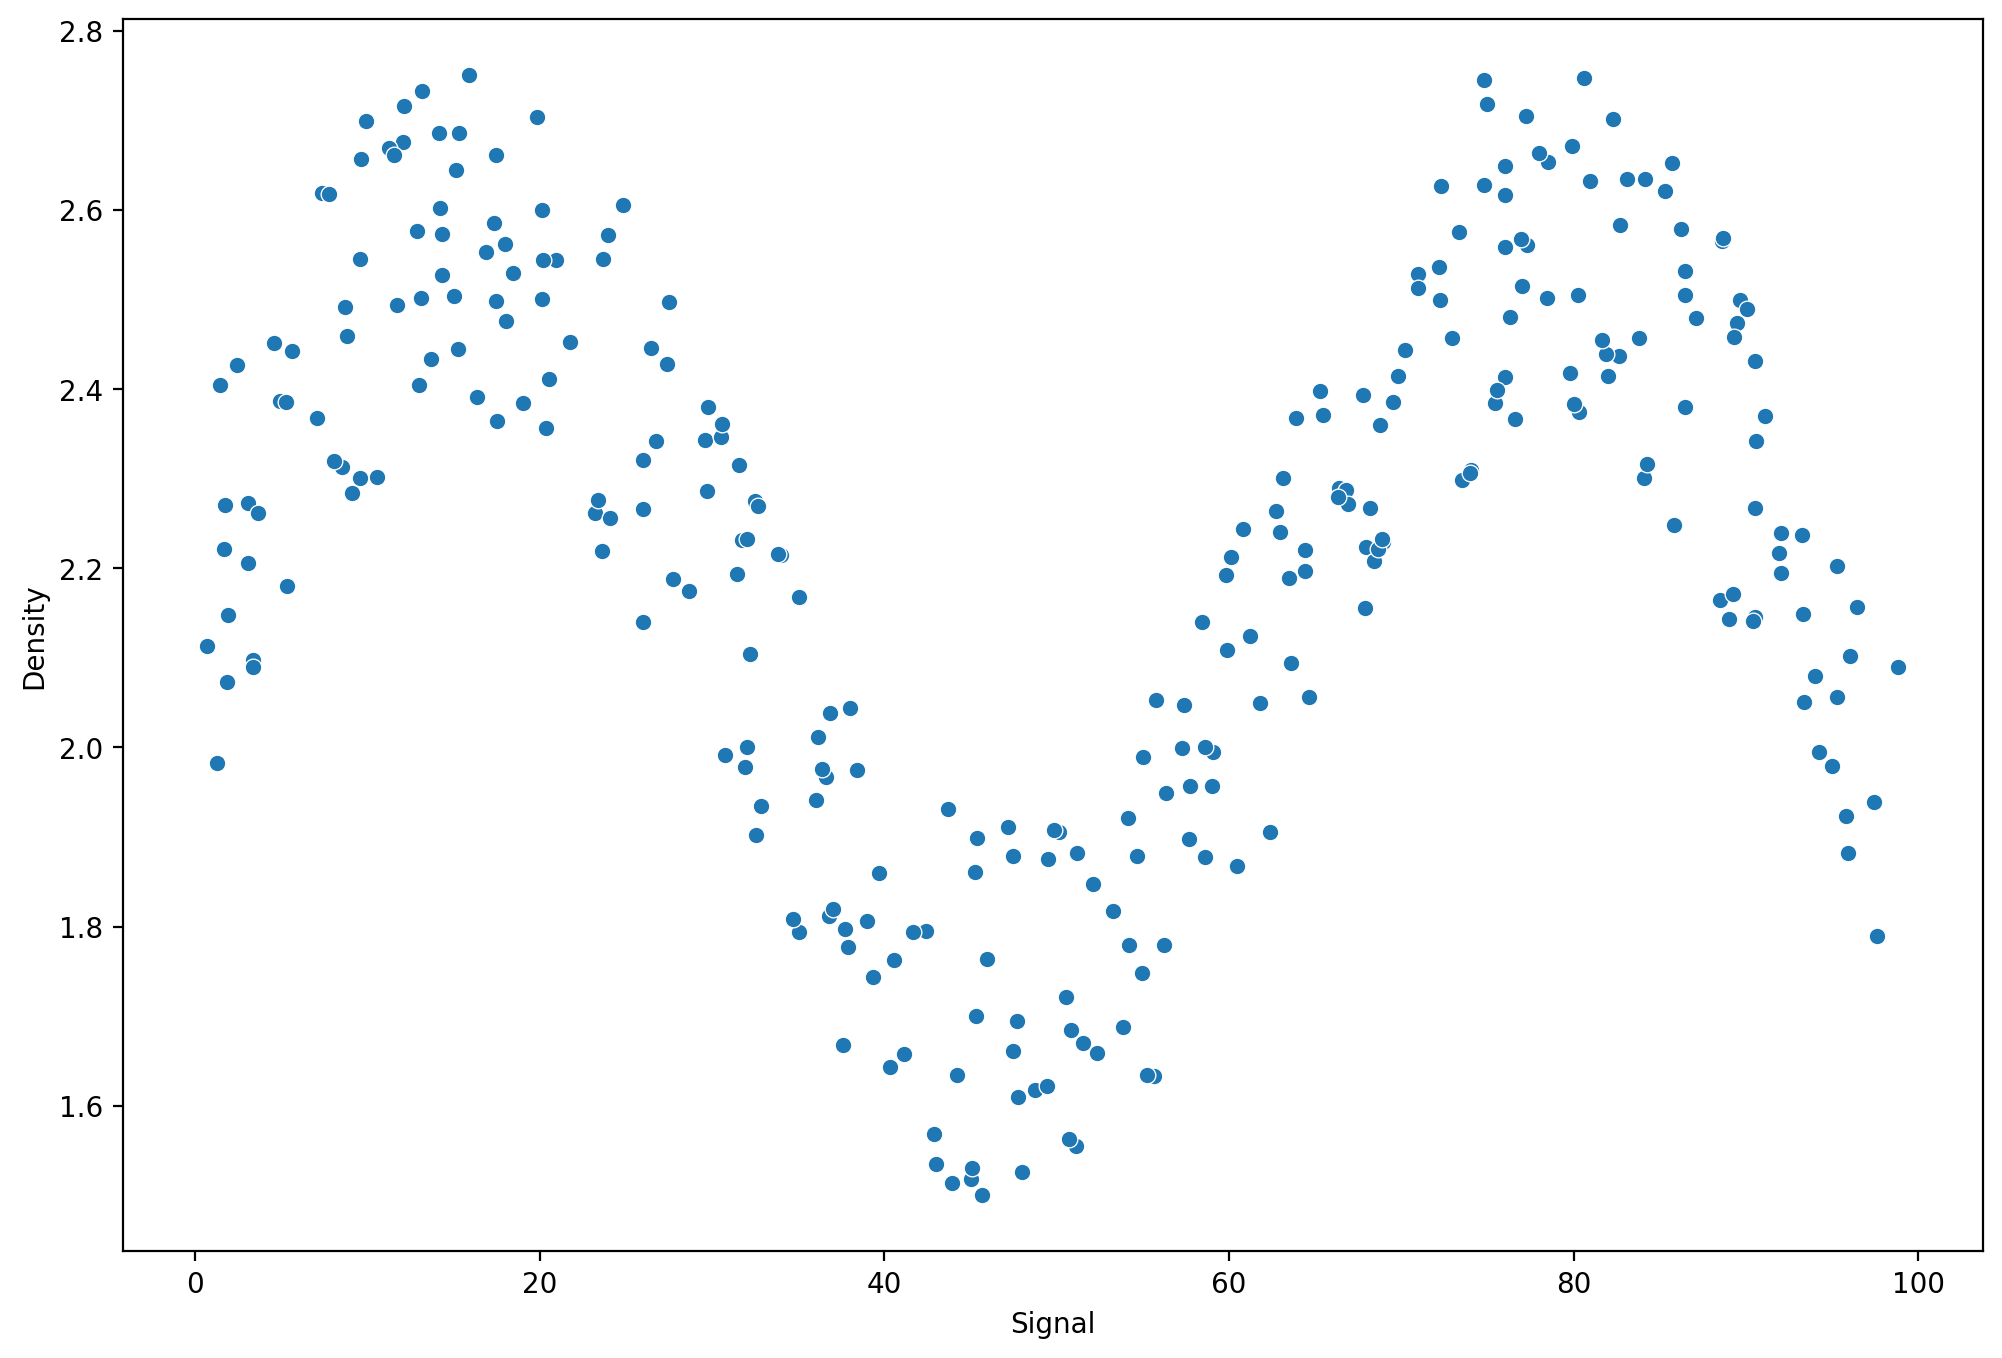

In [5]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

Based on some lab test results of signal strength returned in nHz to their sensors for various rock density types tested, we can see there is almost a sine wave like relationship, where signal strength oscillates based off the density.

---
---

## Splitting the Data

In [6]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

-----

# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


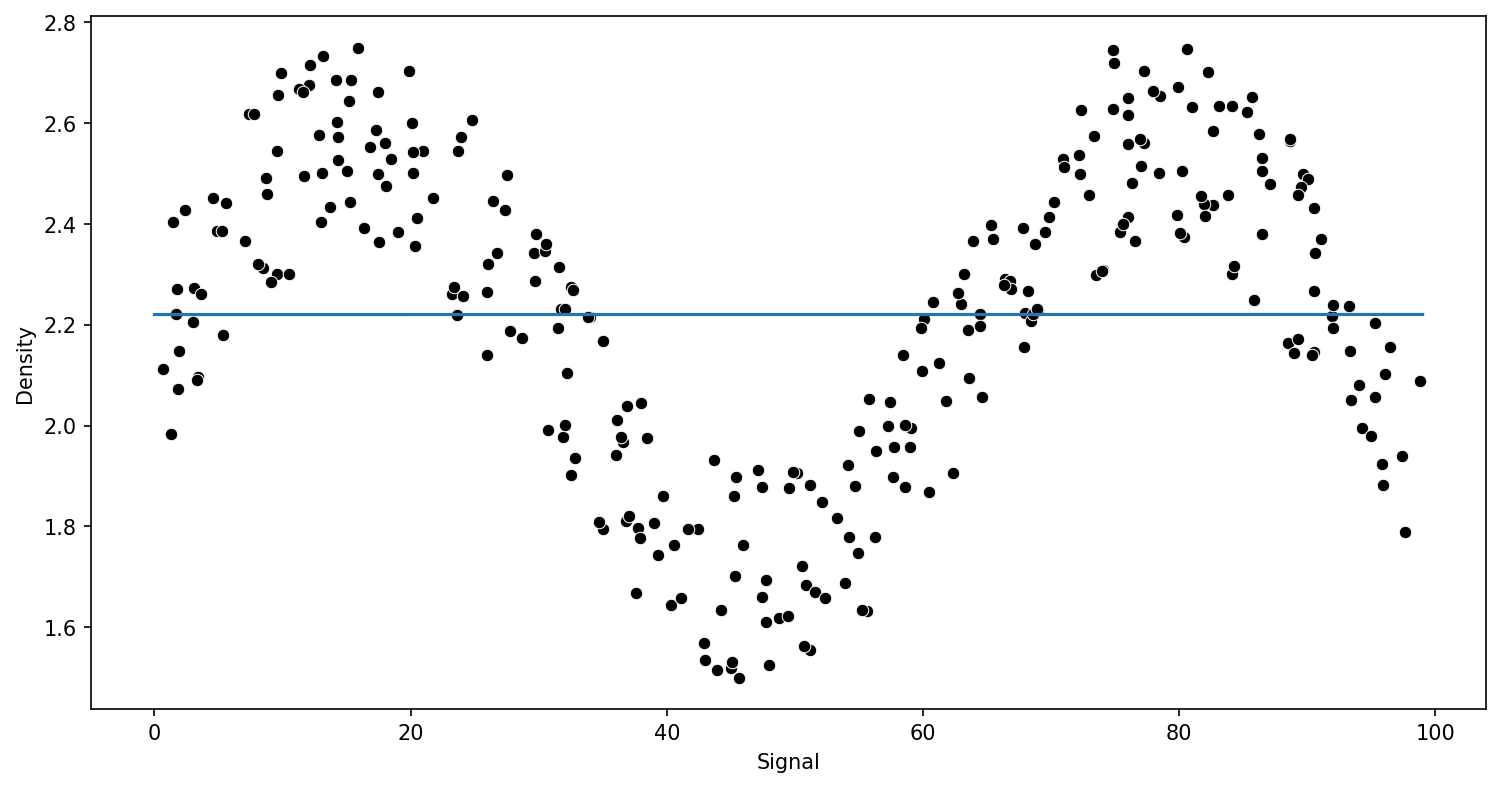

In [11]:
lr_model = LinearRegression()
run_model(lr_model,X_train,y_train,X_test,y_test)

When I graphed it out, not predicting well despite of small MSE

---

# Polynomial Regression

RMSE : 0.2817309563725596
RMSE : 0.1400917280701832


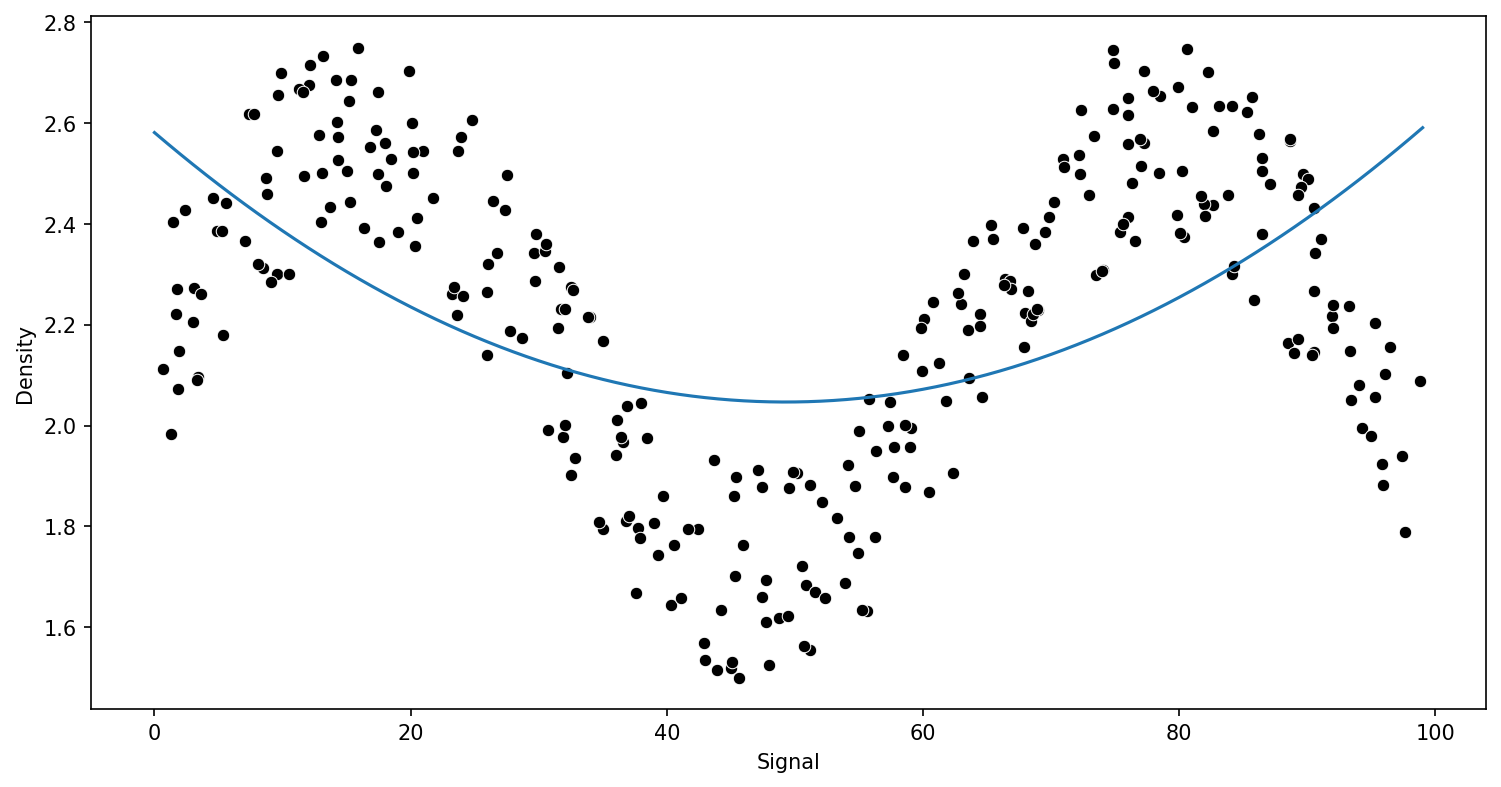

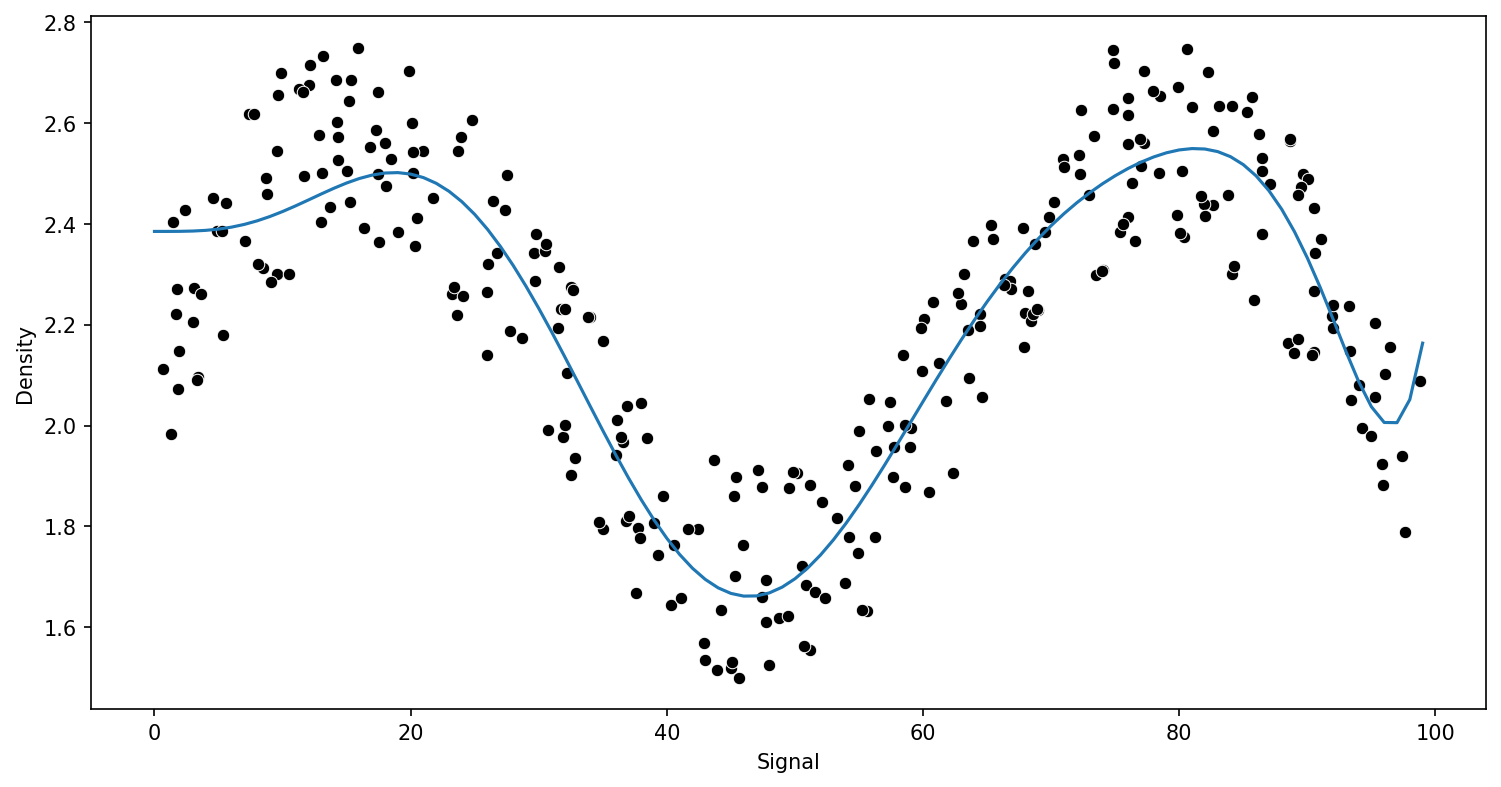

In [13]:
## Attempting with a Polynomial Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

----

## KNN Regression

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


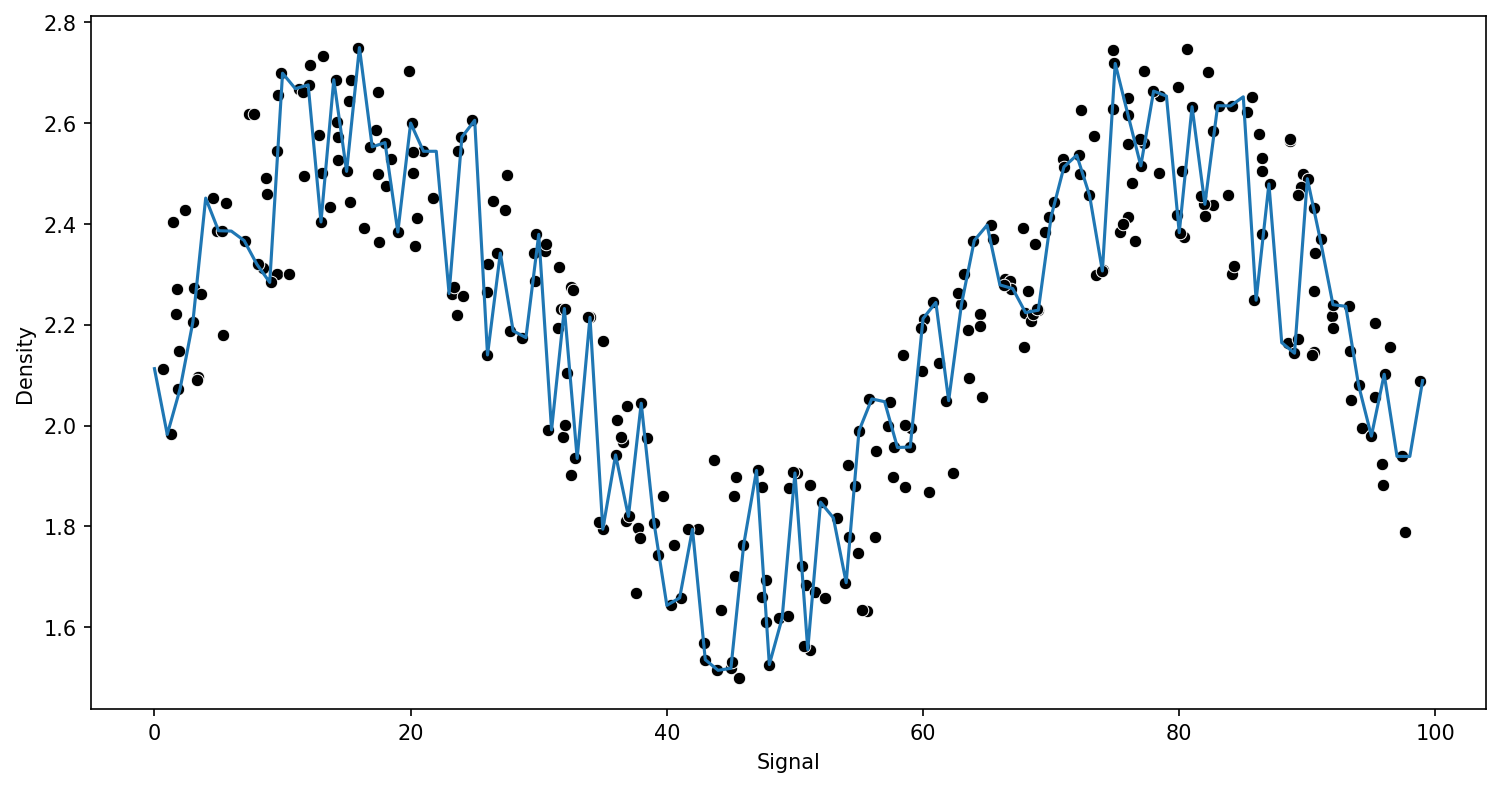

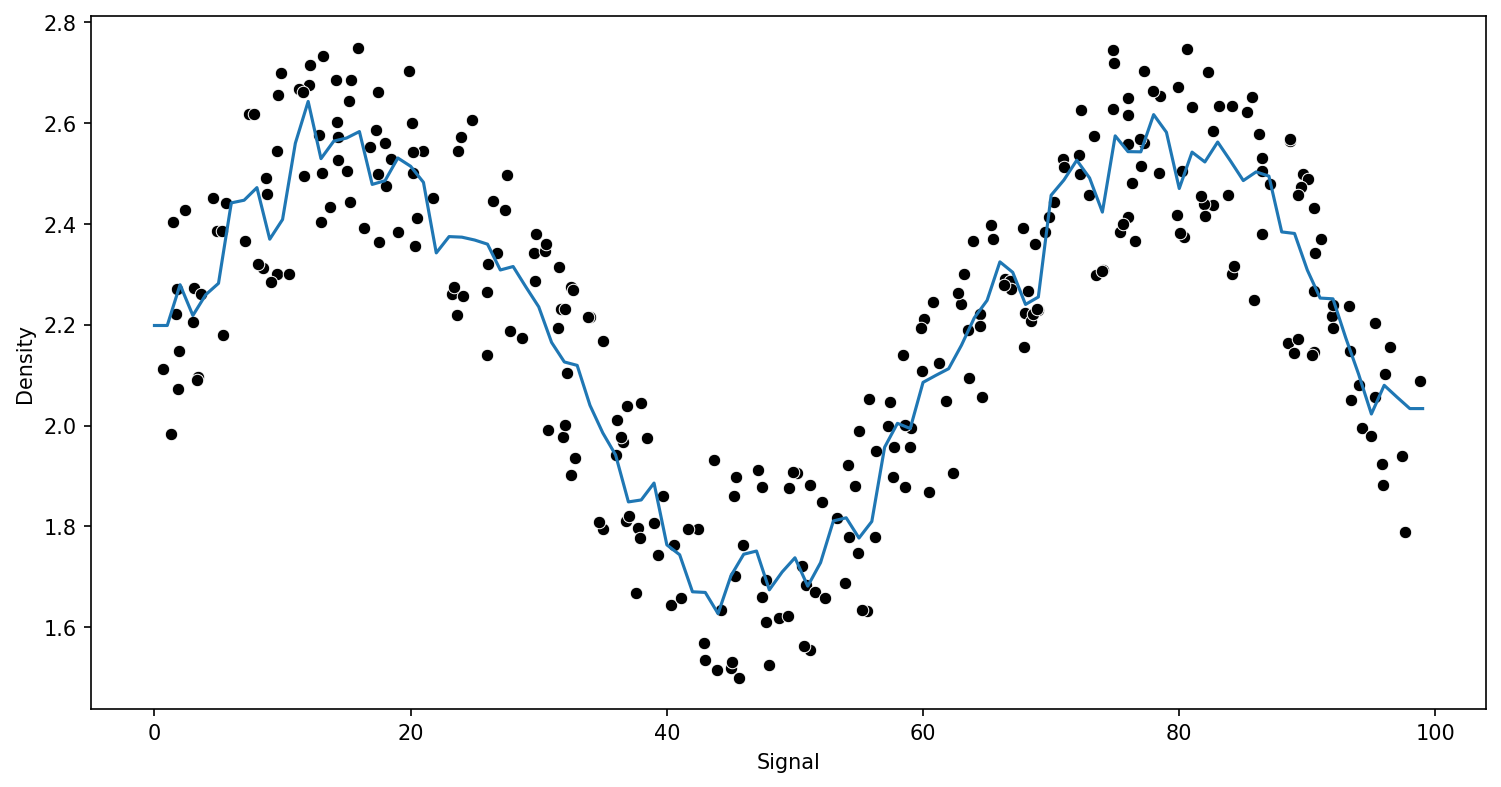

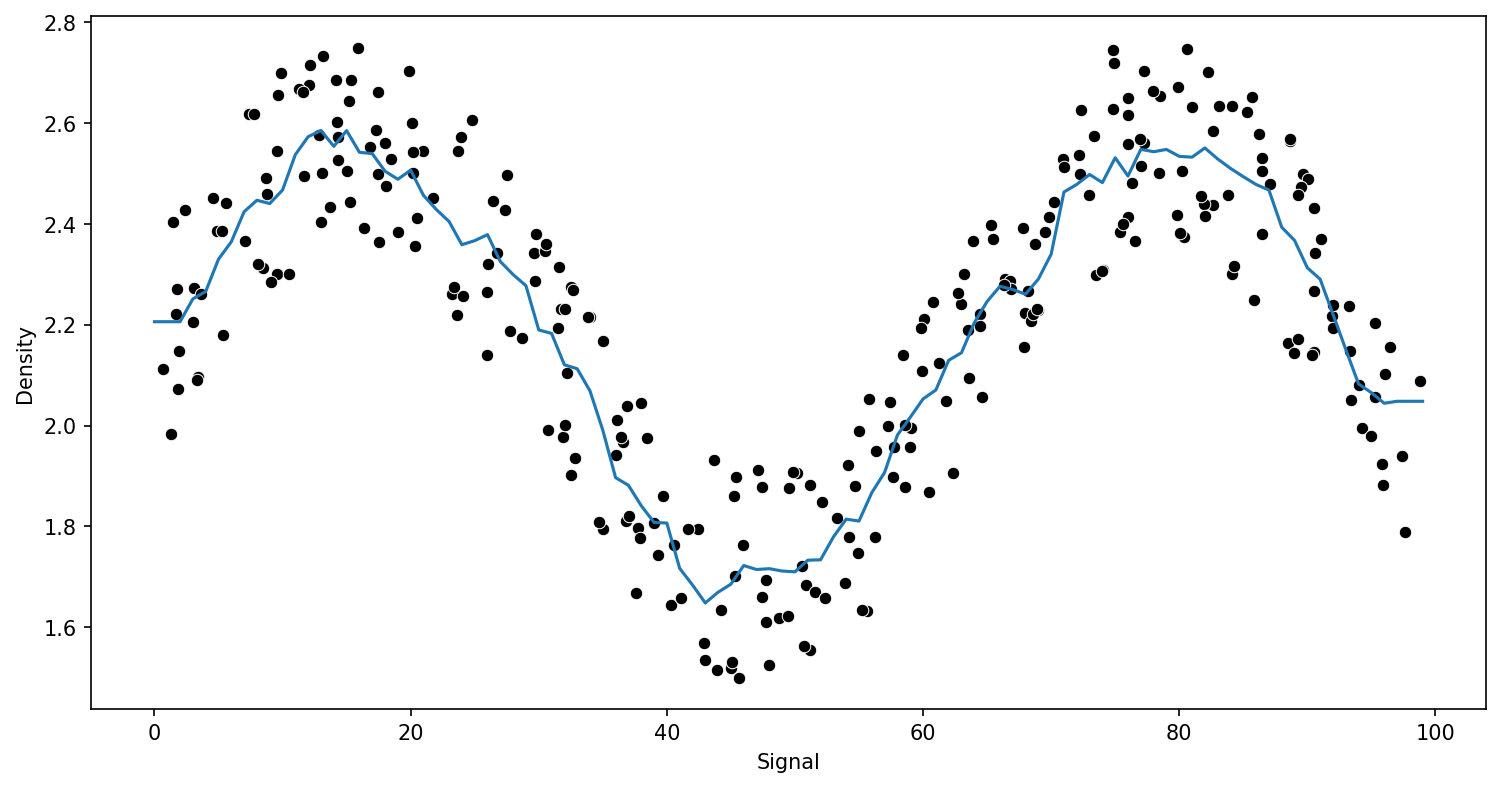

In [14]:
from sklearn.neighbors import KNeighborsRegressor

preds = {}
k_values = [1,5,10]
for n in k_values:
    
    knn_model = KNeighborsRegressor(n_neighbors=n)
    run_model(knn_model,X_train,y_train,X_test,y_test)

---
## Decision Tree Regression

RMSE : 0.1523487028635337


270

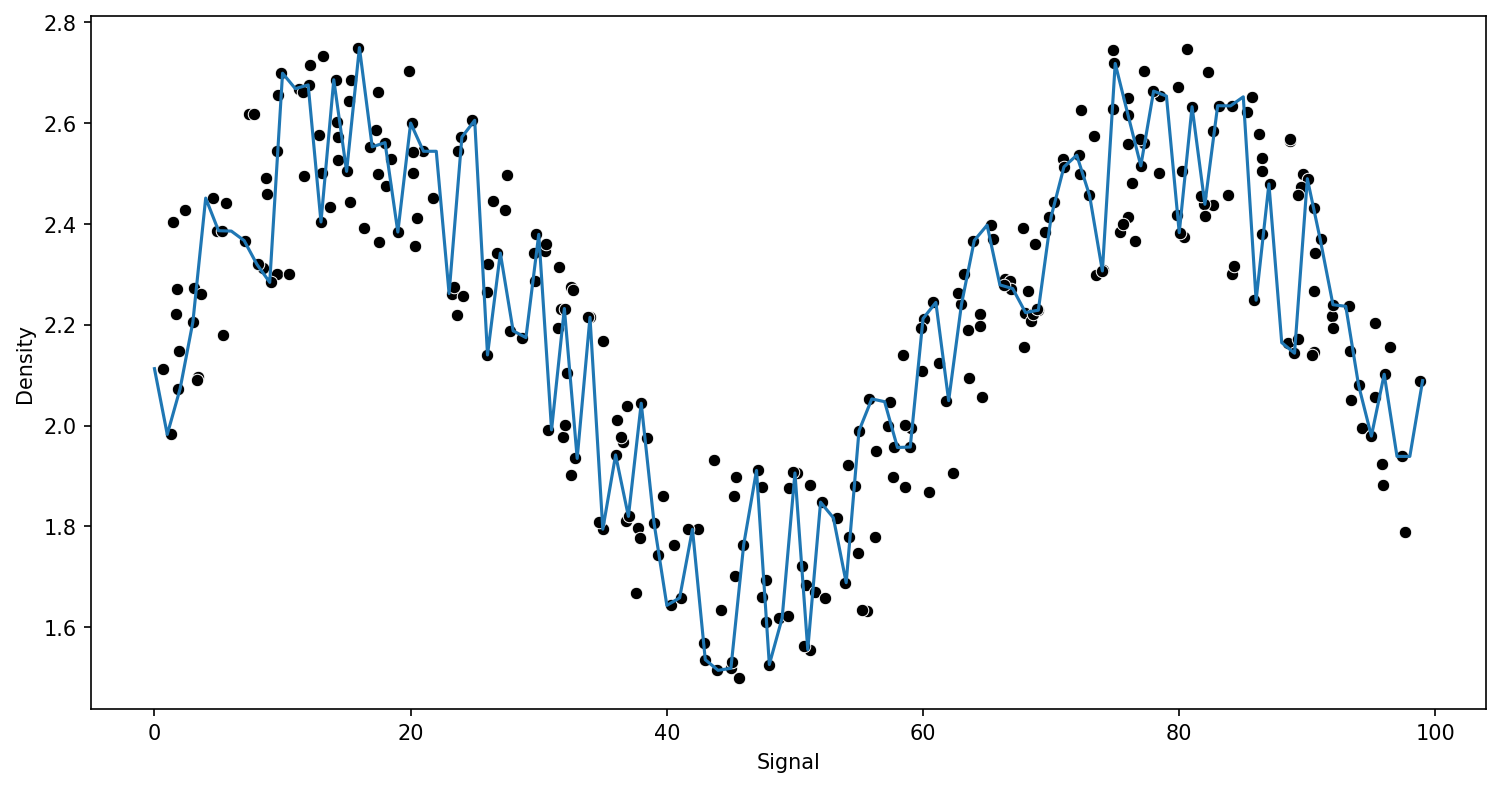

In [15]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
run_model(dt_model,X_train,y_train,X_test,y_test)

dt_model.get_n_leaves()

----

## Support Vector Regression

RMSE : 0.12646999302046696


SVR(C=1000)

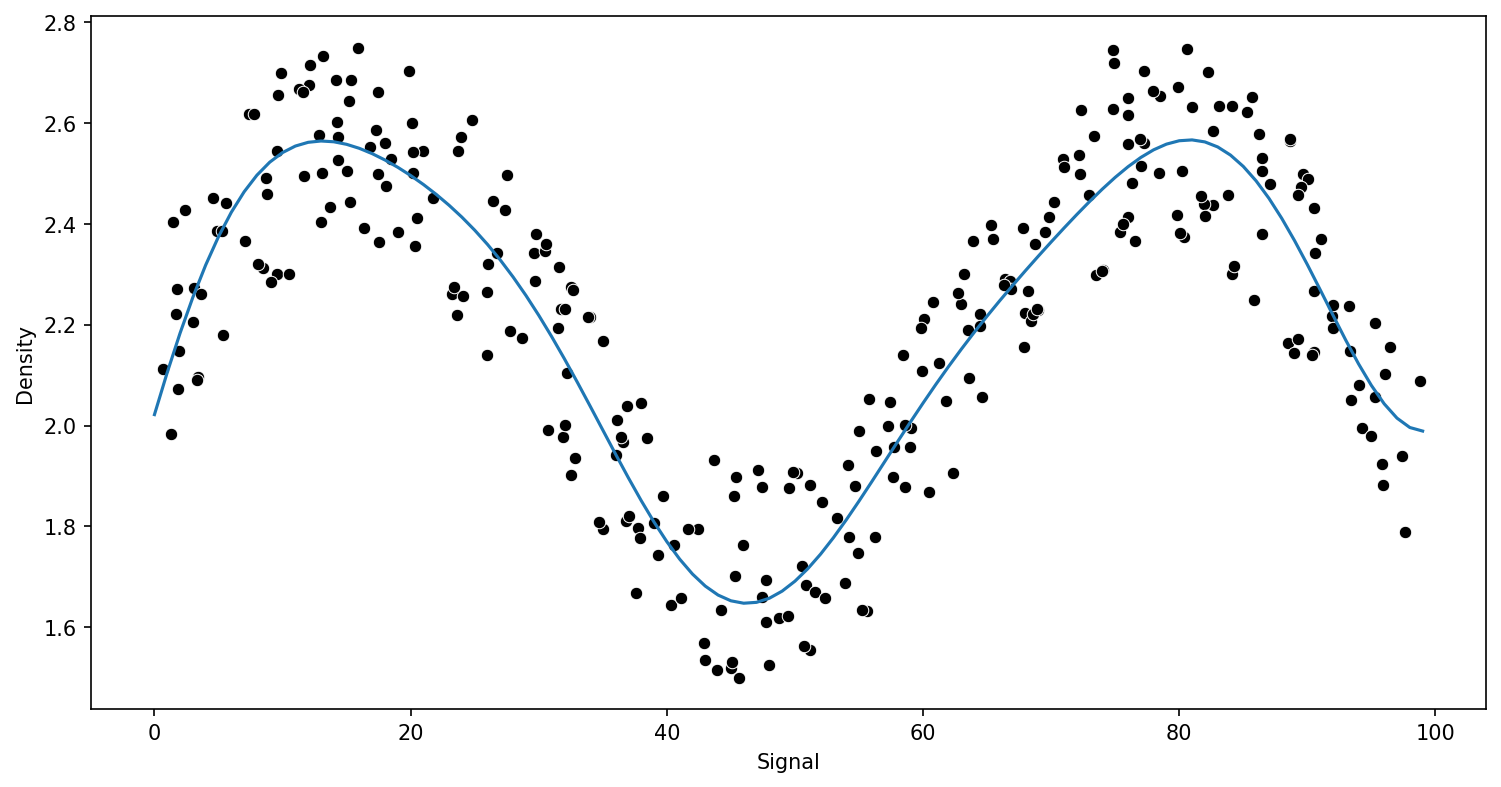

In [16]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

grid = GridSearchCV(svr,param_grid)

run_model(grid,X_train,y_train,X_test,y_test)

grid.best_estimator_

---

## Random Forest Regression

RMSE : 0.1409854962020958
RMSE : 0.13029338937595483
RMSE : 0.13125112082139306


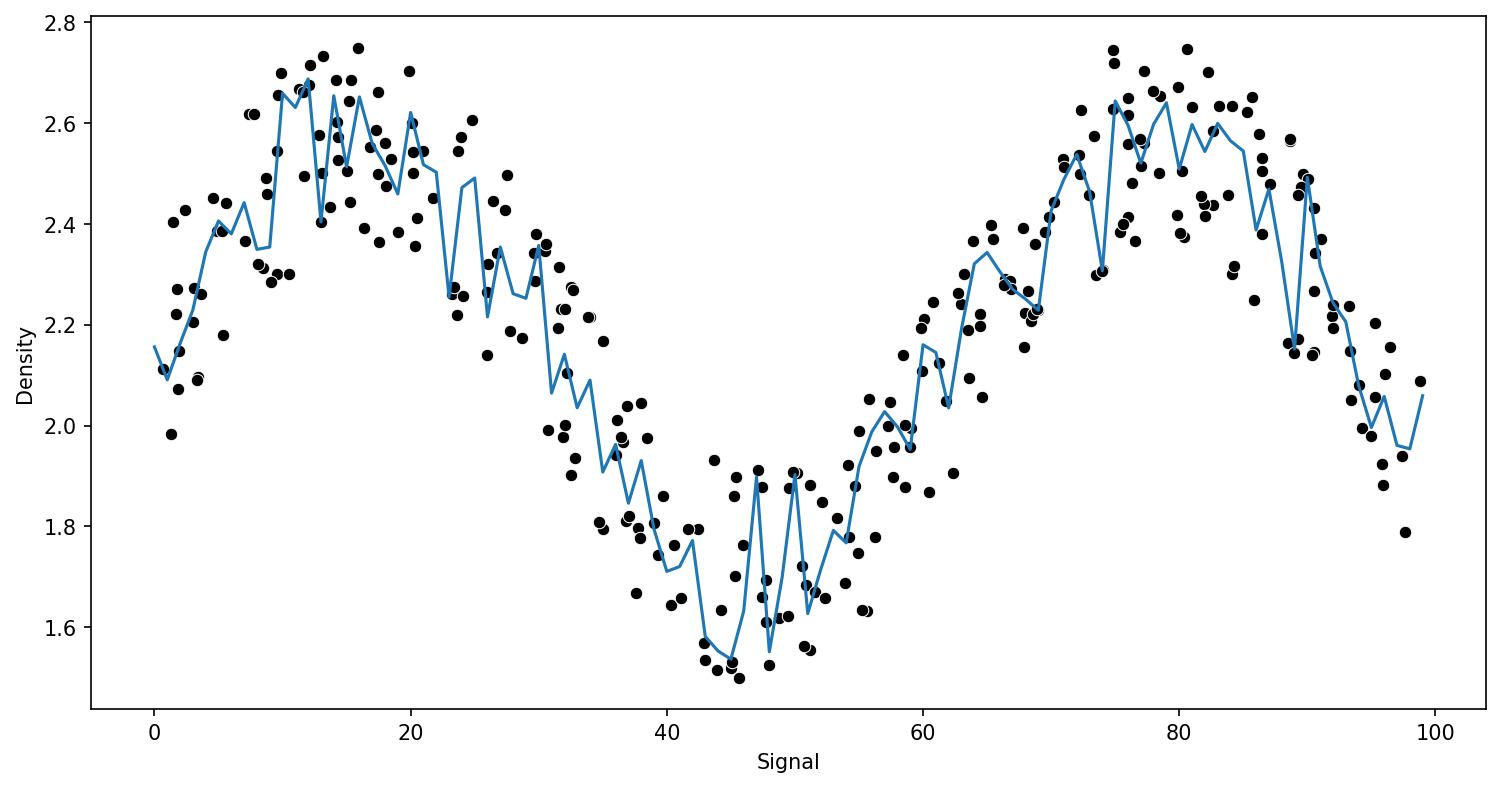

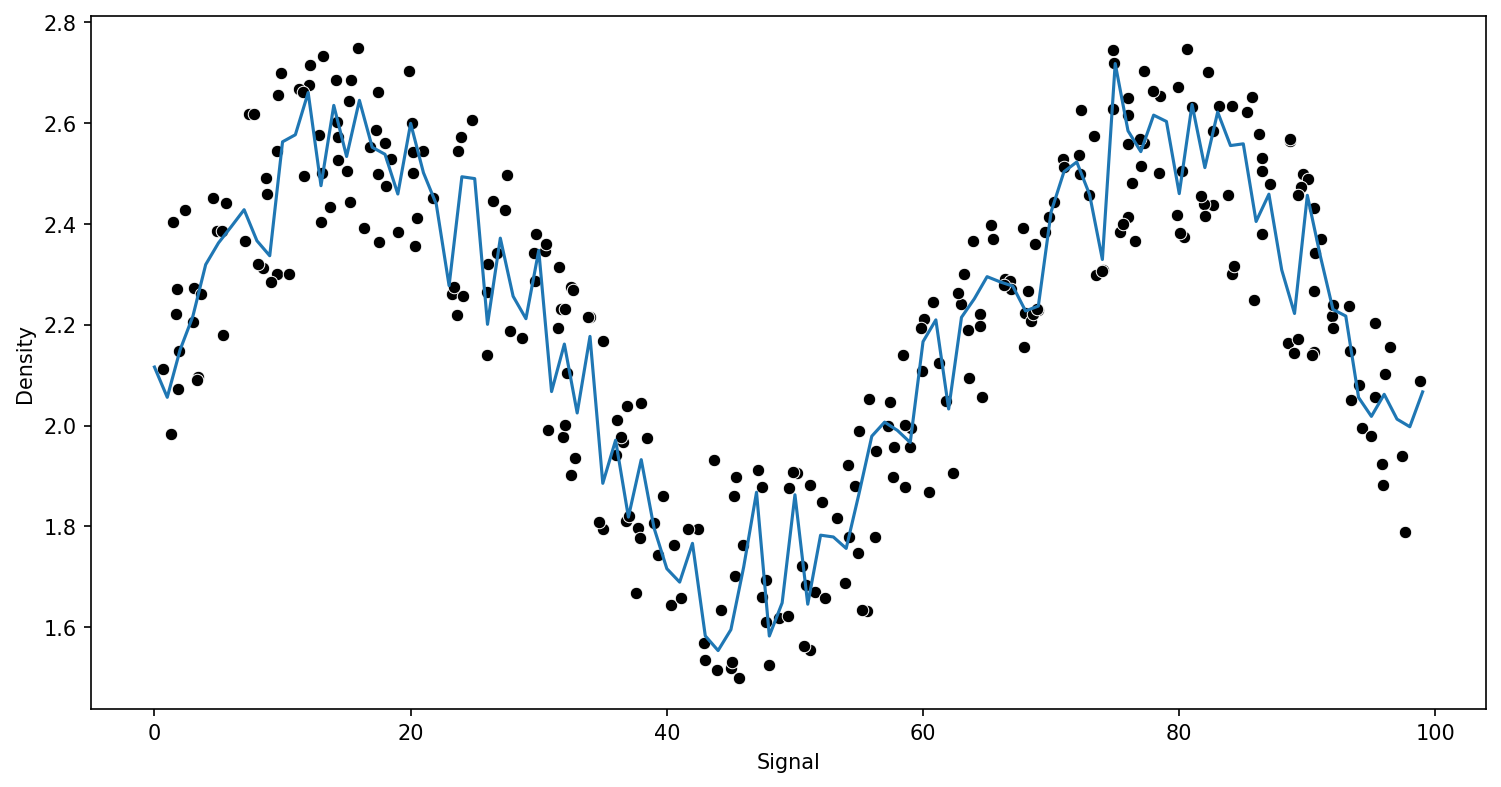

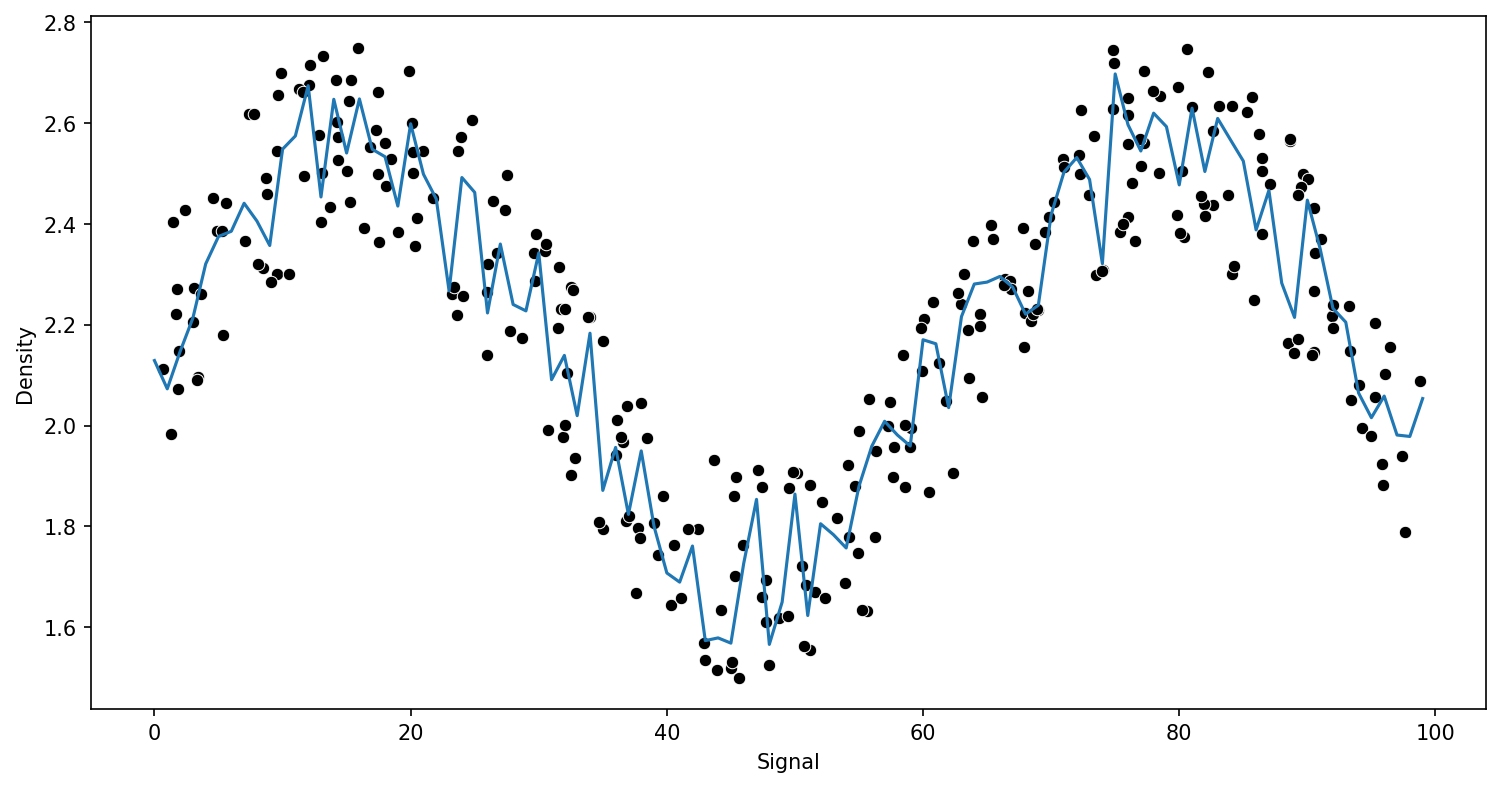

In [17]:
from sklearn.ensemble import RandomForestRegressor

trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

___

## Gradient Boosting

RMSE : 0.13294148649584667


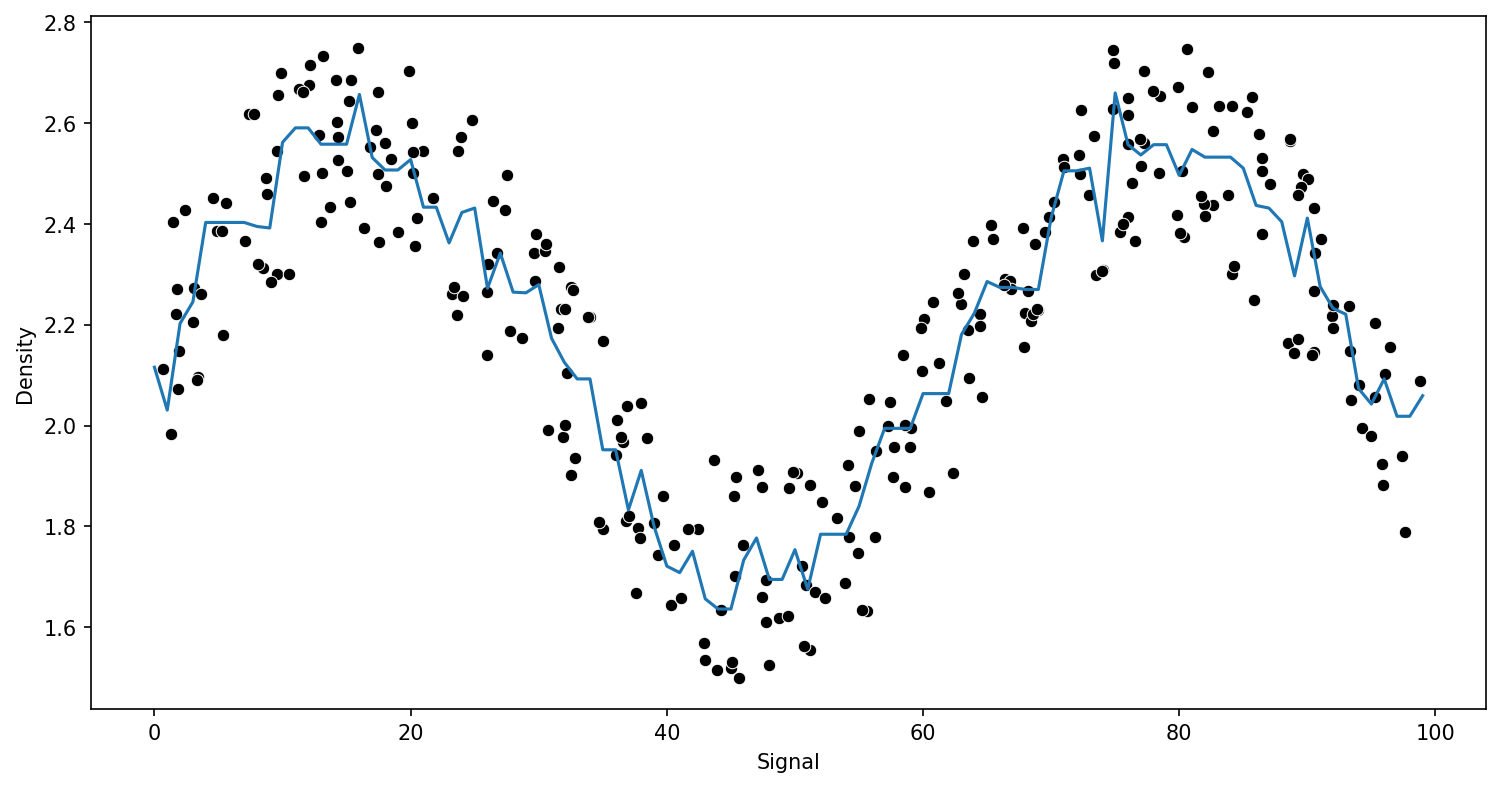

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()

run_model(gb_model,X_train,y_train,X_test,y_test)

___

## Adaboost

RMSE : 0.13294148649584667


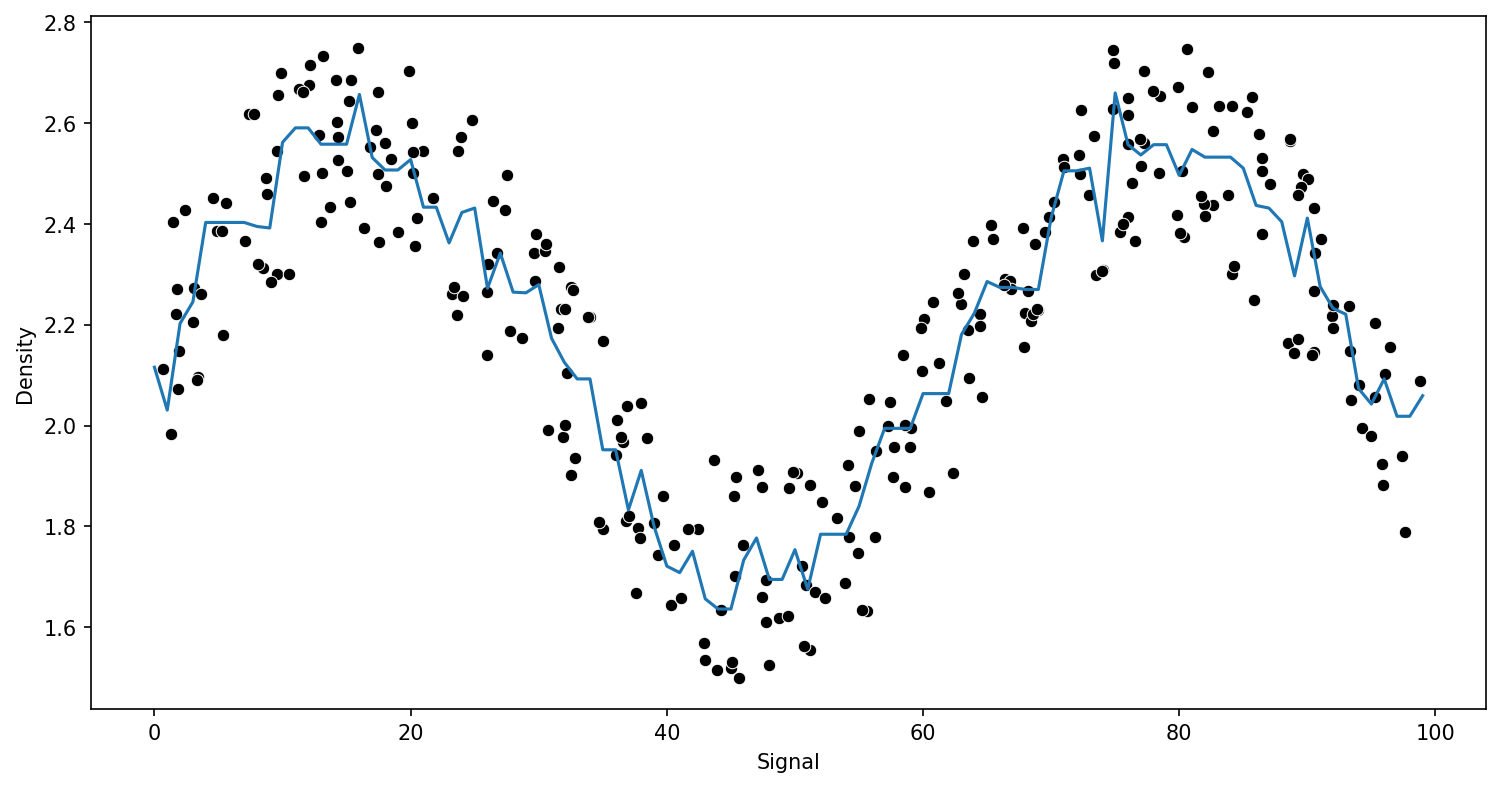

In [19]:
from sklearn.ensemble import AdaBoostRegressor

ab_model = GradientBoostingRegressor()

run_model(ab_model,X_train,y_train,X_test,y_test)


----